# Importar Librerias

In [1]:
# Análisis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

---

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# !ls "/content/drive/MyDrive/Colab Notebooks/prediccion-inmueble"

In [4]:
# df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/prediccion-inmueble/train.xlsx")
# df = pd.read_excel("train.xlsx")

---

In [5]:
# lectura del archivo excel
df = pd.read_excel("MAGDALENA.xlsx")

In [6]:
filas, columnas = df.shape
print("Número de filas:", filas)
print("Número de columnas:", columnas)

Número de filas: 2313
Número de columnas: 11


In [7]:
df.head()

,Año,Trimestre,Precio en soles corrientes,Distrito,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,2021,2,239808.337143,Magdalena,45,1,1,0,NaN,NaN,6
1,2024,4,244125.605662,Magdalena,45,1,1,0,0.0,1.0,15
2,2021,2,252861.196000,Magdalena,45,1,1,1,NaN,NaN,2
3,2024,1,259386.419799,Magdalena,45,1,1,0,0.0,1.0,7
4,2024,2,266878.207994,Magdalena,45,1,1,0,0.0,1.0,0


## Eliminar columnas

**Columna Distrito**
- En los datos, todos los registros tienen el valor "Bellavista" → no aporta variabilidad al modelo.
- Si todos los valores son iguales, esta variable no ayuda a explicar el precio

**Vista al exterior**
- Según los datos, solo contiene "1" o vacío.
- Si casi todos son "1" → es prácticamente constante, no aporta valor.

In [8]:
df.drop(["Distrito", "Vista al exterior"], axis=1, inplace=True)

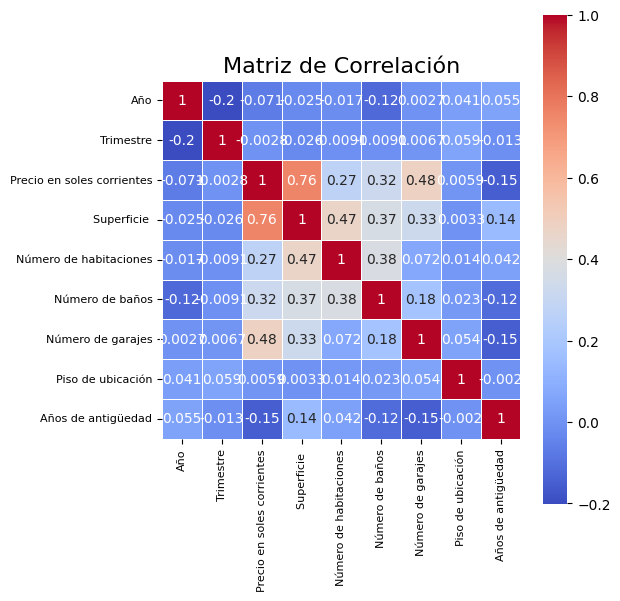

In [9]:
# Calcular la correlación
corr = df.corr()

plt.figure(figsize=(len(corr.columns) * 0.7, len(corr.columns) * 0.7))  # ajustar tamaño dinámico
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    square=True,        # celdas cuadradas
    linewidths=0.5
)

plt.title("Matriz de Correlación", fontsize=16)
plt.xticks(rotation=90, fontsize=8)   # gira labels eje X
plt.yticks(rotation=0, fontsize=8)    # labels eje Y
plt.tight_layout()
plt.show()

### Matriz de correlación

* Va de **-1 a 1**:

  * **1** → correlación positiva perfecta (si una sube, la otra también).
  * **-1** → correlación negativa perfecta (si una sube, la otra baja).
  * **0** → no hay relación lineal.

* Color:

  * **Rojo** → correlación positiva fuerte.
  * **Azul** → correlación negativa.
  * **Cercano a blanco** → casi sin relación.

---

### Interpretación de la matriz

1. **Variable objetivo: "Precio en soles corrientes"**

   * `Superficie` → **0.79** → **alta correlación positiva**.
     📌 Significa que a mayor superficie, mayor precio → es la variable más importante.
   * `Número de habitaciones` → **0.53** → correlación positiva moderada.
     📌 Más habitaciones suelen implicar mayor precio.
   * `Número de baños` → **0.37** → correlación positiva moderada-baja.
   * `Años de antigüedad` → **0.20** → correlación baja, pero positiva.
   * `Trimestre`, `Piso de ubicación`, `Número de garajes`, `Año` → correlación muy baja, casi nula.
     📌 No parecen aportar mucha información para explicar el precio.

---

2. **Relaciones entre variables predictoras**

   * `Superficie` y `Número de habitaciones` → **0.61** → fuerte relación (tiene sentido: más grande la vivienda, más habitaciones).
   * `Número de habitaciones` y `Número de baños` → **0.41** → moderada, suelen crecer juntas.
   * `Número de baños` y `Años de antigüedad` → **-0.31** → ligera correlación negativa, viviendas más nuevas tienden a tener más baños.

---

3. **Variables poco útiles**

   * `Trimestre`, `Piso de ubicación` y `Número de garajes` → correlaciones muy cercanas a 0 con el precio → probablemente no agreguen mucho valor en un modelo lineal.
   * Pero ojo: que no haya correlación lineal **no significa que no tengan algún efecto no lineal** (podrían ser útiles en modelos no lineales).

---

### Conclusión

* Las variables más relevantes para predecir el precio son:
  **Superficie > Habitaciones > Baños > Antigüedad**.
* Puedes considerar eliminar o dar menos peso a:
  **Trimestre, Año, Piso de ubicación, Número de garajes** (al menos en un modelo lineal).


In [10]:
df.head()

,Año,Trimestre,Precio en soles corrientes,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Años de antigüedad
0,2021,2,239808.337143,45,1,1,0,NaN,6
1,2024,4,244125.605662,45,1,1,0,0.0,15
2,2021,2,252861.196000,45,1,1,1,NaN,2
3,2024,1,259386.419799,45,1,1,0,0.0,7
4,2024,2,266878.207994,45,1,1,0,0.0,0


In [12]:
# Contar valores vacíos por columna
df.isnull().sum()

Año                             0
Trimestre                       0
Precio en soles corrientes      0
Superficie                      0
Número de habitaciones          0
Número de baños                 0
Número de garajes               0
Piso de ubicación             203
Años de antigüedad              0
dtype: int64

In [13]:
# 3. Rellenar NaN con la media de cada columna
df = df.fillna(df.mean(numeric_only=True))

In [15]:
# df = pd.get_dummies(df, columns=["Distrito"], drop_first=True)

In [16]:
df.head()

,Año,Trimestre,Precio en soles corrientes,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Años de antigüedad
0,2021,2,239808.337143,45,1,1,0,0.016114,6
1,2024,4,244125.605662,45,1,1,0,0.000000,15
2,2021,2,252861.196000,45,1,1,1,0.016114,2
3,2024,1,259386.419799,45,1,1,0,0.000000,7
4,2024,2,266878.207994,45,1,1,0,0.000000,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Año                         2313 non-null   int64  
 1   Trimestre                   2313 non-null   int64  
 2   Precio en soles corrientes  2313 non-null   float64
 3   Superficie                  2313 non-null   int64  
 4   Número de habitaciones      2313 non-null   int64  
 5   Número de baños             2313 non-null   int64  
 6   Número de garajes           2313 non-null   int64  
 7   Piso de ubicación           2313 non-null   float64
 8   Años de antigüedad          2313 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 162.8 KB


## Entrenamiento

In [18]:
X = df.drop(columns=["Precio en soles corrientes"])
y = df["Precio en soles corrientes"]

In [19]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()
# Ajustar (entrenar) el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
# Predecir sobre el set de prueba
y_pred = model.predict(X_test)

In [22]:
y_pred

array([ 669854.57254072,  511226.00765292,  713353.81039802,
        394320.06821399,  639224.07199025,  427909.9478954 ,
        672851.18511616,  694251.55893007,  739663.30983687,
        622330.66008157,  574569.18820704,  510230.98480831,
        636581.10948359,  457986.79941434,  490855.85152605,
        499971.06084677,  625628.99837181,  427398.24948604,
        963325.40281277,  445515.00789131,  688436.11083626,
        616780.1276118 ,  733034.36342695,  407780.193589  ,
        533761.89064872,  896098.31825245,  443568.46397061,
        451361.54576037,  696516.14079404,  464608.22400007,
        565403.7220322 ,  563164.54960469,  724316.52459218,
        574943.2895655 ,  618305.48686466,  659213.18102904,
        553929.13513662,  381982.98205194,  637845.80391864,
        731819.35160265,  774297.27538329,  649979.76955327,
       1051766.5355287 ,  473708.76569258,  559889.27155348,
        602290.67332241,  723913.23044298,  579119.73710885,
        472037.16310779,

In [23]:
import pandas as pd

# Crear un DataFrame comparando valores reales vs predichos
resultados = pd.DataFrame({
    "Real": y_test.values,
    "Predicho": y_pred,
    "Diferencia": y_test.values - y_pred
})

print(resultados)  # mostrar las primeras filas


             Real      Predicho     Diferencia
0    8.082330e+05  6.698546e+05  138378.474661
1    4.757134e+05  5.112260e+05  -35512.580117
2    6.737261e+05  7.133538e+05  -39627.733843
3    3.962452e+05  3.943201e+05    1925.167093
4    6.103089e+05  6.392241e+05  -28915.125049
5    3.741779e+05  4.279099e+05  -53732.043934
6    7.420390e+05  6.728512e+05   69187.780217
7    5.901981e+05  6.942516e+05 -104053.473299
8    7.060864e+05  7.396633e+05  -33576.942692
9    6.783347e+05  6.223307e+05   56004.057343
10   4.158182e+05  5.745692e+05 -158750.985617
11   4.453183e+05  5.102310e+05  -64912.642685
12   5.306034e+05  6.365811e+05 -105977.671078
13   4.828649e+05  4.579868e+05   24878.101019
14   4.052767e+05  4.908559e+05  -85579.141609
15   4.731054e+05  4.999711e+05  -26865.638199
16   5.271010e+05  6.256290e+05  -98528.039343
17   4.439218e+05  4.273982e+05   16523.560038
18   9.063404e+05  9.633254e+05  -56985.041702
19   5.918634e+05  4.455150e+05  146348.387972
20   6.473860

## Evaluar el modelo

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Raíz del error cuadrático medio
rmse = np.sqrt(mse)

# R² (qué tan bien explica la varianza de y)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 8581013667.650461
RMSE: 92633.76094950728
R²: 0.720220495316836


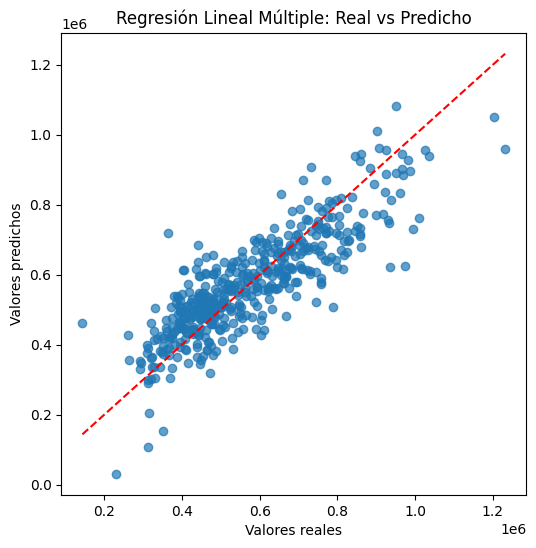

In [26]:
import matplotlib.pyplot as plt

# --- 1. Gráfico Real vs Predicho ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Regresión Lineal Múltiple: Real vs Predicho")
plt.show()

In [27]:
# cuánto influye cada variable en el precio
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
})
print(coeficientes.sort_values(by="Coeficiente", ascending=False))

                 Variable   Coeficiente
5       Número de garajes  61914.437238
2             Superficie    7021.498751
4         Número de baños   1705.911340
1               Trimestre    251.670932
6       Piso de ubicación  -1320.253546
7      Años de antigüedad  -4320.355678
0                     Año  -5839.171677
3  Número de habitaciones -24252.866681


In [28]:
import joblib

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(model, "modelo.pkl")

['modelo.pkl']

In [29]:
!ls

MAGDALENA.xlsx	modelo.pkl  VENTA_INMUEBLE.ipynb


In [30]:
# Cargar el modelo desde el archivo .pkl
modelo_cargado = joblib.load("modelo.pkl")

# Ahora puedes usarlo directamente
y_pred = modelo_cargado.predict(X_test)

In [31]:
y_pred

array([ 669854.57254072,  511226.00765292,  713353.81039802,
        394320.06821399,  639224.07199025,  427909.9478954 ,
        672851.18511616,  694251.55893007,  739663.30983687,
        622330.66008157,  574569.18820704,  510230.98480831,
        636581.10948359,  457986.79941434,  490855.85152605,
        499971.06084677,  625628.99837181,  427398.24948604,
        963325.40281277,  445515.00789131,  688436.11083626,
        616780.1276118 ,  733034.36342695,  407780.193589  ,
        533761.89064872,  896098.31825245,  443568.46397061,
        451361.54576037,  696516.14079404,  464608.22400007,
        565403.7220322 ,  563164.54960469,  724316.52459218,
        574943.2895655 ,  618305.48686466,  659213.18102904,
        553929.13513662,  381982.98205194,  637845.80391864,
        731819.35160265,  774297.27538329,  649979.76955327,
       1051766.5355287 ,  473708.76569258,  559889.27155348,
        602290.67332241,  723913.23044298,  579119.73710885,
        472037.16310779,

In [32]:
X_test

,Año,Trimestre,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Años de antigüedad
1646,2024,1,95,3,2,1,0.000000,2
509,2021,1,72,2,2,1,0.016114,11
1882,2024,2,103,2,3,1,0.000000,11
44,2023,4,50,1,1,1,0.000000,5
1586,2022,4,93,2,2,0,0.000000,0
1237,2023,1,86,3,1,0,0.000000,30
1338,2023,3,87,1,2,1,0.000000,1
1922,2024,1,105,3,3,1,0.000000,13
2026,2024,4,110,3,1,1,0.000000,10
1633,2024,1,95,3,2,1,0.000000,13


In [33]:
df_nuevo = pd.read_excel("m1.xlsx")
df_nuevo.drop(["Distrito", "Vista al exterior"], axis=1, inplace=True)
df_nuevo = df_nuevo.fillna(df_nuevo.mean(numeric_only=True))

In [34]:
# Separar X (las features) -> NO debe incluir "Precio en soles corrientes"
X_new = df_nuevo.drop(columns=["Precio en soles corrientes"], errors="ignore")

y_pred = modelo_cargado.predict(X_new)

In [35]:
y_pred

array([817783.34401693])